In [1]:
import pandas as pd
import itertools
import functools
from collections import defaultdict
from copy import deepcopy

# Read this!
Definately output the ratio of cat1 vs cat3 the opponent likely has in a situation.  Even if I don't do this, at least implicitly do it by coming up with an optimum strategy vs them.  For example, found one situation where opponent only has 2 cat1 hands, but likely bluffs with a very large range of hands; and they don't even know they are overbluffing.

# Consider RL with 80% vs self and 20% vs past self
- (Randomize to start)
- Here are your moves, maximize your status after flop: (equity * pot) - investment
- (Just few modifications to equity based on position and give cat3 implied odds always) (prob just +/- few %)

## What are the Default Strategies?
- Make sure there is a strategy that makes sense for in and out of position
- The default strategy will be used by the first opponent bot

Strategies are found in the 9max/postflop ranges folder

Add implied odds for cat3 primarily estimated.

## What are the Ranges and Positions for Each Range?

- Do not analyze any 4Bets or cold 4Bets (raise for RFI vs 3Bet and all Cold4B ranges)

In [2]:
# RFI
lj_rfi = "55+,A2s+,K9s+,Q9s+,J9s+,T9s,98s,87s,76s,AJo+,KQo+"
hj_rfi = "22+,A2s+,K9s+,Q9s+,J9s+,T9s,98s,87s,76s,65s,ATo+,KJo+,QJo"
co_rfi = "22+,A2s+,K6s+,Q8s+,J8s+,T8s+,97s+,86s+,75s+,65s,54s,ATo+,KTo+,QTo+,JTo"
bn_rfi = "22+,A2s+,K4s+,Q6s+,J7s+,T7s+,96s+,85s+,75s+,64s+,53s+,43s,A4o+,K9o+,Q9o+,J9o+,T9o"
sb_rfi = "22+,A2s+,K3s+,Q5s+,J6s+,T6s+,96s+,85s+,75s+,64s+,53s+,43s,A2o+,K8o+,Q9o+,J9o+,T9o,98o"

# vs RFI
vsRFI_bb_vs_lj__raise = "TT+,AQs+,AKo"
vsRFI_bb_vs_lj__call = "99-22,AJs-A2s,K6s+,Q8s+,J8s+,T8s+,97s+,86s+,76s,65s,54s,AQo-ATo,KTo+,QTo+,JTo"
vsRFI_bb_vs_hj__raise = "TT+,ATs+,AKo"
vsRFI_bb_vs_hj__call = "99-22,A9s-A2s,K5s+,Q7s+,J7s+,T7s+,96s+,86s+,75s+,65s,54s,43s,AQo-ATo,KTo+,QTo+,JTo"
vsRFI_bb_vs_co__raise = "99+,A8s+,KJs+,QJs,JTs,T9s,98s,AQo+,KQo"
vsRFI_bb_vs_co__call = "88-22,A7s-A2s,KTs-K2s,QTs-Q5s,J9s-J6s,T8s-T6s,97s-96s,85s+,74s+,64s+,53s+,43s,AJo-A7o,A5o,KJo-K9o,Q9o+,J9o+,T9o"
vsRFI_bb_vs_bn__raise = "88+,A6s+,KTs+,QTs+,JTs,T9s,98s,87s,76s,AJo+,KQo"
vsRFI_bb_vs_bn__call = "77-22,A5s-A2s,K9s-K2s,Q9s-Q2s,J9s-J5s,T8s-T5s,97s-95s,86s-84s,75s-74s,63s+,53s+,42s+,32s,ATo-A2o,KJo-K7o,Q8o+,J8o+,T8o+,98o,87o"
vsRFI_bb_vs_sb__raise = "44+,A8s+,A5s-A3s,K9s+,Q9s+,J9s,T8s+,97s+,86s+,75s+,64s+,54s,AJo+,KQo"
vsRFI_bb_vs_sb__call = "33-22,A7s-A6s,A2s,K8s-K2s,Q8s-Q2s,J8s-J4s,T7s-T4s,96s-94s,85s-84s,74s-73s,63s-62s,53s-52s,42s+,32s,ATo-A2o,KJo-K5o,Q7o+,J7o+,T7o+,97o+,87o,76o,65o"

# vs RFI
vsRFI_hj_vs_lj__raise = "JJ+,AJs+,KQs,AKo"
vsRFI_hj_vs_lj__call = "TT-77,ATs,KJs,QJs,JTs,AQo"
vsRFI_co_vs_lj__raise = "JJ+,AJs+,KQs,AKo"
vsRFI_co_vs_lj__call = "TT-66,ATs,KJs,QJs,JTs,AQo"
vsRFI_co_vs_hj__raise = "JJ+,AJs+,A5s-A4s,KQs,T9s,AQo+"
vsRFI_co_vs_hj__call = "TT-55,ATs,KJs,QJs,JTs"
vsRFI_bn_vs_lj__raise = "JJ+,AKs,A5s-A2s,AKo"
vsRFI_bn_vs_lj__call = "TT-55,AQs-ATs,KTs+,QTs+,JTs,T9s,98s,87s,AQo"
vsRFI_bn_vs_hj__raise = "JJ+,AJs+,A8s,A5s-A2s,KQs,76s,65s,54s,AKo"
vsRFI_bn_vs_hj__call = "TT-33,ATs-A9s,KJs-KTs,QTs+,JTs,T9s,98s,87s,AQo-AJo,KQo"
vsRFI_bn_vs_co__raise = "TT+,ATs+,A7s-A2s,KJs+,QJs,JTs,T9s,76s,65s,54s,AJo+,KQo"
vsRFI_bn_vs_co__call = "99-22,A9s-A8s,KTs,QTs,98s,87s"
vsRFI_sb_vs_lj__raise = "JJ+,ATs+,KQs,AKo"
vsRFI_sb_vs_lj__call = "TT-77,QJs,JTs,AQo"
vsRFI_sb_vs_hj__raise = "JJ+,ATs+,KJs+,QJs,JTs,AQo+"
vsRFI_sb_vs_hj__call = "TT-66,T9s"
vsRFI_sb_vs_co__raise = "JJ+,A9s+,A5s-A4s,KJs+,QJs,JTs,T9s,98s,AJo+,KQo"
vsRFI_sb_vs_co__call = "TT-55,KTs,QTs"
vsRFI_sb_vs_bn__raise = "55+,A2s+,K9s+,Q9s+,J9s+,T8s+,98s,87s,76s,ATo+,KQo+"
vsRFI_sb_vs_bn__call = ""

RFIvs3B_lj_vs_hjco_call = "JJ-77,AQs-AJs,KQs,QJs,JTs"
RFIvs3B_lj_vs_bn_call = "JJ-77,AQs-AJs,KJs+,QJs,JTs,T9s"
RFIvs3B_lj_vs_blinds_call = "JJ-66,AQs-ATs,KJs+,QJs,JTs,T9s"
RFIvs3B_hj_vs_ahead_call = "TT-66,AQs-ATs,KTs+,QTs+,JTs,T9s,AQo"
RFIvs3B_co_vs_bn_call = "TT-66,AQs-A8s,KTs+,QTs+,JTs,T9s,98s,AQo"
RFIvs3B_co_vs_blinds_call = "TT-55,AQs-A8s,KTs+,QTs+,JTs,T9s,98s,87s,AQo"
RFIvs3B_bnsb_vs_ahead_call = "TT-33,AQs-A6s,K9s+,Q9s+,J9s+,T8s+,97s+,87s,76s,65s,54s,ATo+,KJo+,QJo"


## Script to Read Ranges and Output Combos Collection

In [3]:
# Input: range
def range_to_hands(c_range="JJ+,AJs+,KQs,AKo"):
    m = {
        "A": 14, "K": 13, "Q": 12, "J": 11, "T": 10, "9": 9,
        "8": 8, "7": 7, "6": 6, "5": 5, "4": 4, "3": 3, "2": 2
    }
    temp = c_range.split(",")

    pps = []
    pp = temp[0]
    if "+" in pp:
        for i in range(14,m[pp[0]]-1,-1):
            pps.append([i, i])
    elif "-" in pp:
        for i in range(m[pp[0]],m[pp[-1]]-1,-1):
            pps.append([i, i])
    else:
        pps.append([m[pp[0]], m[pp[0]]])

    ss = []
    temp_s = [x for x in temp if "s" in x]
    for s in temp_s:
        if "+" in s:
            for i in range(m[s[0]]-1,m[s[1]]-1,-1):
                ss.append([m[s[0]], i])
        elif "-" in s:
            for i in range(m[s[1]],m[s[5]]-1,-1):
                ss.append([m[s[0]], i])
        else:
            ss.append([m[s[0]], m[s[1]]])

    os = []
    temp_o = [x for x in temp if "o" in x]
    for o in temp_o:
        if "+" in o:
            for i in range(m[o[0]]-1,m[o[1]]-1,-1):
                os.append([m[o[0]], i])
        elif "-" in o:
            for i in range(m[o[1]],m[o[5]]-1,-1):
                os.append([m[o[0]], i])
        else:
            os.append([m[o[0]], m[o[1]]])
    # Output: [[2,2]], [[14,13]], [[14,13]]
        # PP, Suited, Offsuit
    return pps, ss, os


## What Hands & Range Fall Under Which Category Given a Definition
Definitions may have slightly changed after this image was created

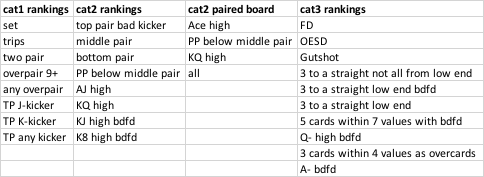

- cat1 will use simple logic to determine best rule based on flop alone
- cat2 rule will be optimized for
- cat3 rule will be optimized for

In [4]:
cat1_rankings = ["set", "trips", "two pair", "overpair 9+", "any overpair", "TP J-kicker", 
                 "TP K-kicker", "TP any kicker"]
cat2_nonpaired_rankings = ["top pair bad kicker", "middle pair", "bottom pair", "PP below middle pair",
                           "AJ high", "KQ high", "KJ high bdfd", "K8 high bdfd", ]
cat2_paired_rankings = ["Ace high", "PP below top card", "KQ high", "all"]
cat3_rankings = ["FD", "OESD", "Gutshot", "3 to a straight not all from low end", 
                 "3 to a straight low end bdfd", "3 to a straight low end", 
                 "5 cards within 7 values with bdfd", "Q- high bdfd", 
                 "3 cards within 4 values as overcards", "A- bdfd"]
first_cat4_pp_rankings = ["JJ", "TT", "99", "88", "77", "66", "55", "44", "33", "22"]


In [5]:
def my_hands_cat1_level_x_and_above(x):
    result = [[], [], []]
    if x >= 1:
        result[1] += my_hands_s_straight
        result[2] += my_hands_o_straight
    if x >= 2:
        result[0] += my_hands_pp_sets
    if x >= 3:
        result[1] += my_hands_s_trips
        result[2] += my_hands_o_trips
    if x >= 4:
        result[1] += my_hands_s_two_pair
        result[2] += my_hands_o_two_pair
    if x >= 5:
        result[0] += my_hands_pp_overpair_9plus
    if x >= 6:
        result[0] += my_hands_pp_any_overpair
    if x >= 7:
        result[1] += my_hands_s_tp_k_kicker
        result[2] += my_hands_o_tp_k_kicker
    if x >= 8:
        result[1] += my_hands_s_tp_j_kicker
        result[2] += my_hands_o_tp_j_kicker
    if x >= 9:
        result[1] += my_hands_s_tp_any_kicker
        result[2] += my_hands_o_tp_any_kicker
        
    result[0].sort(reverse=True)
    result[1].sort(reverse=True)
    result[2].sort(reverse=True)
    result[0] = list(k for k,_ in itertools.groupby(result[0]))
    result[1] = list(k for k,_ in itertools.groupby(result[1]))
    result[2] = list(k for k,_ in itertools.groupby(result[2]))        
    
    # Return result
    my_hands_cat1 = result
    return my_hands_cat1    
        
# Performance improvement by filtering out cat1 from hands already, but would also need a copy of hands
def my_hands_cat2_level_x_and_above(x, my_hands_cat1):
    result = [[], [], []]
    if x >= 1:
        # Cat 1
        result[1] += my_hands_s_straight
        result[2] += my_hands_o_straight
        result[0] += my_hands_pp_sets
        result[1] += my_hands_s_trips
        result[2] += my_hands_o_trips
        result[1] += my_hands_s_two_pair
        result[2] += my_hands_o_two_pair
        result[0] += my_hands_pp_overpair_9plus
        result[0] += my_hands_pp_any_overpair
        result[1] += my_hands_s_tp_k_kicker
        result[2] += my_hands_o_tp_k_kicker
        result[1] += my_hands_s_tp_j_kicker
        result[2] += my_hands_o_tp_j_kicker
        result[1] += my_hands_s_tp_any_kicker
        result[2] += my_hands_o_tp_any_kicker
        
        # Cat 2
        result[1] += my_hands_s_tp_bad_kicker
        result[2] += my_hands_o_tp_bad_kicker
    if x >= 2:
        result[1] += my_hands_s_middle_pair
        result[2] += my_hands_o_middle_pair
    if x >= 3:
        result[0] += my_hands_pp_below_top_pair        
    if x >= 4:
        result[1] += my_hands_s_bottom_pair
        result[2] += my_hands_o_bottom_pair
    if x >= 5:
        result[1] += my_hands_s_aj_high
        result[2] += my_hands_o_aj_high
    if x >= 6:
        result[0] += my_hands_pp_below_middle_pair
    if x >= 7:
        result[1] += my_hands_s_kq_high
        result[2] += my_hands_o_kq_high
    if x >= 8:
        result[0] += my_hands_pp_below_bottom_pair
    if x >= 9:
        result[1] += my_hands_s_kj_high
        result[2] += my_hands_o_kj_high
    if x >= 10:
        result[1] += my_hands_s_k8_high
        result[2] += my_hands_o_k8_high        
        
    result[0].sort(reverse=True)
    result[1].sort(reverse=True)
    result[2].sort(reverse=True)
    result[0] = list(k for k,_ in itertools.groupby(result[0]))
    result[1] = list(k for k,_ in itertools.groupby(result[1]))
    result[2] = list(k for k,_ in itertools.groupby(result[2]))        

    # Interim
    cat1_unique_pp = [x for (x,y) in my_hands_cat1[0]]
    cat1_unique_s = [x for (x,y) in my_hands_cat1[1]]
    cat1_unique_o = [x for (x,y) in my_hands_cat1[2]]
    
    # Remove cat1 from these cat2s
    result[0] = [(x,y) for (x,y) in result[0] if x not in cat1_unique_pp]
    result[1] = [(x,y) for (x,y) in result[1] if x not in cat1_unique_s]
    result[2] = [(x,y) for (x,y) in result[2] if x not in cat1_unique_o]
    
    # Return result
    my_hands_cat2 = result
    return my_hands_cat2

# Performance improvement by filtering out cat1+cat2 from hands already, but would also need a copy of hands
def my_hands_cat3_level_x_and_above(x, my_hands_cat1, my_hands_cat2):
    bdfd_result = [[], [], []]
    other_result = [[], [], []]
    result = [[], [], []]
    if x >= 1:
        other_result[0] += my_hands_pp_fd
        other_result[1] += my_hands_s_fd
        other_result[2] += my_hands_o_fd
    if x >= 2:
        other_result[0] += my_hands_pp_oesd        
        other_result[1] += my_hands_s_oesd
        other_result[2] += my_hands_o_oesd
    if x >= 3:
        other_result[0] += my_hands_pp_gutshot        
        other_result[1] += my_hands_s_gutshot
        other_result[2] += my_hands_o_gutshot
    if x >= 4:
        other_result[1] += my_hands_s_3_to_straight_not_all_from_low_end
        other_result[2] += my_hands_o_3_to_straight_not_all_from_low_end
    if x >= 5:
        bdfd_result[1] += my_hands_s_3_to_straight_low_end_bdfd
        bdfd_result[2] += my_hands_o_3_to_straight_low_end_bdfd
    if x >= 6:
        other_result[1] += my_hands_s_3_to_straight_low_end
        other_result[2] += my_hands_o_3_to_straight_low_end
    if x >= 7:
        bdfd_result[1] += my_hands_s_5_unique_cards_within_7_values_bdfd
        bdfd_result[2] += my_hands_o_5_unique_cards_within_7_values_bdfd
    if x >= 8:
        bdfd_result[0] += my_hands_pp_q_minus_bdfd
        bdfd_result[1] += my_hands_s_q_minus_bdfd
        bdfd_result[2] += my_hands_o_q_minus_bdfd
    if x >= 9:
        other_result[1] += my_hands_s_lowest_card_is_one_of_3_cards_within_4_values_and_two_overcards
        other_result[2] += my_hands_o_lowest_card_is_one_of_3_cards_within_4_values_and_two_overcards
    if x >= 10:
        bdfd_result[0] += my_hands_pp_a_minus_bdfd        
        bdfd_result[1] += my_hands_s_a_minus_bdfd
        bdfd_result[2] += my_hands_o_a_minus_bdfd

    # Remove duplicates within bdfd hands
    bdfd_result[0].sort(reverse=True)
    bdfd_result[1].sort(reverse=True)
    bdfd_result[2].sort(reverse=True)
    bdfd_result[0] = list(k for k,_ in itertools.groupby(bdfd_result[0]))
    bdfd_result[1] = list(k for k,_ in itertools.groupby(bdfd_result[1]))
    bdfd_result[2] = list(k for k,_ in itertools.groupby(bdfd_result[2]))
    
    # Add all together
    result[0] = bdfd_result[0] + other_result[0]
    result[1] = bdfd_result[1] + other_result[1]
    result[2] = bdfd_result[2] + other_result[2]
    
    # Reduce with max combos number used and sort
    groupby_dict = defaultdict(int)
    for val in result[0]:
        groupby_dict[tuple(val[0])] += val[1]
    result[0] = [(sorted(list(x), reverse=True),min(y, 6)) for (x,y) in groupby_dict.items()]

    groupby_dict = defaultdict(int)
    for val in result[1]:
        groupby_dict[tuple(val[0])] += val[1]
    result[1] = [(sorted(list(x), reverse=True),min(y, 4)) for (x,y) in groupby_dict.items()]
    
    groupby_dict = defaultdict(int)
    for val in result[2]:
        groupby_dict[tuple(val[0])] += val[1]
    result[2] = [(sorted(list(x), reverse=True),min(y, 12)) for (x,y) in groupby_dict.items()]    
    
    # Interim
    cat1_unique_pp = [x for (x,y) in my_hands_cat1[0]]
    cat1_unique_s = [x for (x,y) in my_hands_cat1[1]]
    cat1_unique_o = [x for (x,y) in my_hands_cat1[2]]
    cat2_unique_pp = [x for (x,y) in my_hands_cat2[0]]
    cat2_unique_s = [x for (x,y) in my_hands_cat2[1]]
    cat2_unique_o = [x for (x,y) in my_hands_cat2[2]]    
    
    # Remove cat1 and cat2
    result[0] = [(x,y) for (x,y) in result[0] if x not in cat1_unique_pp and x not in cat2_unique_pp]
    result[1] = [(x,y) for (x,y) in result[1] if x not in cat1_unique_s and x not in cat2_unique_s]
    result[2] = [(x,y) for (x,y) in result[2] if x not in cat1_unique_o and x not in cat2_unique_o]
    
    # Add cat2 hands
    if x >= 11:
        result[1] += [(x,y) for (x,y) in my_hands_s_k8_high if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in my_hands_o_k8_high if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 12:
        result[1] += [(x,y) for (x,y) in my_hands_s_kj_high if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in my_hands_o_kj_high if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 13:
        result[0] += [(x,y) for (x,y) in my_hands_pp_below_bottom_pair if x not in cat1_unique_pp and x not in cat2_unique_pp]
    if x >= 14:
        result[1] += [(x,y) for (x,y) in my_hands_s_kq_high if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in my_hands_o_kq_high if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 15:
        result[0] += [(x,y) for (x,y) in my_hands_pp_below_middle_pair if x not in cat1_unique_pp and x not in cat2_unique_pp]    
    # Add cat4 hands
    if x >= 16:
        remaining_cat2_type_hands_pp = [x for (x,y) in my_hands_pp_below_top_pair]
        remaining_cat2_type_hands_s = [x for (x,y) in my_hands_s_aj_high] + [x for (x,y) in my_hands_s_bottom_pair] + [x for (x,y) in my_hands_s_middle_pair] + [x for (x,y) in my_hands_s_tp_bad_kicker]
        remaining_cat2_type_hands_o = [x for (x,y) in my_hands_o_aj_high] + [x for (x,y) in my_hands_o_bottom_pair] + [x for (x,y) in my_hands_o_middle_pair] + [x for (x,y) in my_hands_o_tp_bad_kicker]
        result[0] += [(x, 6) for x in my_hands[0] if x not in cat1_unique_pp and x not in cat2_unique_pp and x not in remaining_cat2_type_hands_pp]
        result[1] += [(x, 4) for x in my_hands[1] if x not in cat1_unique_s and x not in cat2_unique_s and x not in remaining_cat2_type_hands_s]
        result[2] += [(x, 12) for x in my_hands[2] if x not in cat1_unique_o and x not in cat2_unique_o and x not in remaining_cat2_type_hands_o]
    # Add cat2 hands with pairs
    if x >= 17:
        result[1] += [(x,y) for (x,y) in my_hands_s_aj_high if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in my_hands_o_aj_high if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 18:
        result[1] += [(x,y) for (x,y) in my_hands_s_bottom_pair if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in my_hands_o_bottom_pair if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 19:
        result[0] += [(x,y) for (x,y) in my_hands_pp_below_top_pair if x not in cat1_unique_pp and x not in cat2_unique_pp]
    if x >= 20:
        result[1] += [(x,y) for (x,y) in my_hands_s_middle_pair if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in my_hands_o_middle_pair if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 21:
        result[1] += [(x,y) for (x,y) in my_hands_s_tp_bad_kicker if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in my_hands_o_tp_bad_kicker if x not in cat1_unique_o and x not in cat2_unique_o]        
   
    # Reduce with max combos number used and sort
    groupby_dict = defaultdict(int)
    for val in result[0]:
        groupby_dict[tuple(val[0])] = max(groupby_dict[tuple(val[0])], val[1])
    result[0] = [(sorted(list(x), reverse=True),min(y, 6)) for (x,y) in groupby_dict.items()]

    groupby_dict = defaultdict(int)
    for val in result[1]:
        groupby_dict[tuple(val[0])] = max(groupby_dict[tuple(val[0])], val[1])
    result[1] = [(sorted(list(x), reverse=True),min(y, 4)) for (x,y) in groupby_dict.items()]
    
    groupby_dict = defaultdict(int)
    for val in result[2]:
        groupby_dict[tuple(val[0])] = max(groupby_dict[tuple(val[0])], val[1])
    result[2] = [(sorted(list(x), reverse=True),min(y, 12)) for (x,y) in groupby_dict.items()] 
    
    # Return results
    my_hands_cat3 = result    
    return my_hands_cat3
        

In [6]:
def opponents_hands_cat1_level_x_and_above(x):
    result = [[], [], []]
    if x >= 1:
        result[1] += opponents_hands_s_straight
        result[2] += opponents_hands_o_straight
    if x >= 2:
        result[0] += opponents_hands_pp_sets
    if x >= 3:
        result[1] += opponents_hands_s_trips
        result[2] += opponents_hands_o_trips
    if x >= 4:
        result[1] += opponents_hands_s_two_pair
        result[2] += opponents_hands_o_two_pair
    if x >= 5:
        result[0] += opponents_hands_pp_overpair_9plus
    if x >= 6:
        result[0] += opponents_hands_pp_any_overpair
    if x >= 7:
        result[1] += opponents_hands_s_tp_k_kicker
        result[2] += opponents_hands_o_tp_k_kicker
    if x >= 8:
        result[1] += opponents_hands_s_tp_j_kicker
        result[2] += opponents_hands_o_tp_j_kicker
    if x >= 9:
        result[1] += opponents_hands_s_tp_any_kicker
        result[2] += opponents_hands_o_tp_any_kicker
        
    result[0].sort(reverse=True)
    result[1].sort(reverse=True)
    result[2].sort(reverse=True)
    result[0] = list(k for k,_ in itertools.groupby(result[0]))
    result[1] = list(k for k,_ in itertools.groupby(result[1]))
    result[2] = list(k for k,_ in itertools.groupby(result[2]))        
    
    # Return result
    opponents_hands_cat1 = result
    return opponents_hands_cat1    
        
# Performance improvement by filtering out cat1 from hands already, but would also need a copy of hands
def opponents_hands_cat2_level_x_and_above(x, opponents_hands_cat1):
    result = [[], [], []]
    if x >= 1:
        # Cat 1
        result[1] += opponents_hands_s_straight
        result[2] += opponents_hands_o_straight
        result[0] += opponents_hands_pp_sets
        result[1] += opponents_hands_s_trips
        result[2] += opponents_hands_o_trips
        result[1] += opponents_hands_s_two_pair
        result[2] += opponents_hands_o_two_pair
        result[0] += opponents_hands_pp_overpair_9plus
        result[0] += opponents_hands_pp_any_overpair
        result[1] += opponents_hands_s_tp_k_kicker
        result[2] += opponents_hands_o_tp_k_kicker
        result[1] += opponents_hands_s_tp_j_kicker
        result[2] += opponents_hands_o_tp_j_kicker
        result[1] += opponents_hands_s_tp_any_kicker
        result[2] += opponents_hands_o_tp_any_kicker
        
        # Cat 2
        result[1] += opponents_hands_s_tp_bad_kicker
        result[2] += opponents_hands_o_tp_bad_kicker
    if x >= 2:
        result[1] += opponents_hands_s_middle_pair
        result[2] += opponents_hands_o_middle_pair
    if x >= 3:
        result[0] += opponents_hands_pp_below_top_pair        
    if x >= 4:
        result[1] += opponents_hands_s_bottom_pair
        result[2] += opponents_hands_o_bottom_pair
    if x >= 5:
        result[1] += opponents_hands_s_aj_high
        result[2] += opponents_hands_o_aj_high
    if x >= 6:
        result[0] += opponents_hands_pp_below_middle_pair
    if x >= 7:
        result[1] += opponents_hands_s_kq_high
        result[2] += opponents_hands_o_kq_high
    if x >= 8:
        result[0] += opponents_hands_pp_below_bottom_pair
    if x >= 9:
        result[1] += opponents_hands_s_kj_high
        result[2] += opponents_hands_o_kj_high
    if x >= 10:
        result[1] += opponents_hands_s_k8_high
        result[2] += opponents_hands_o_k8_high        
        
    result[0].sort(reverse=True)
    result[1].sort(reverse=True)
    result[2].sort(reverse=True)
    result[0] = list(k for k,_ in itertools.groupby(result[0]))
    result[1] = list(k for k,_ in itertools.groupby(result[1]))
    result[2] = list(k for k,_ in itertools.groupby(result[2]))        

    # Interim
    cat1_unique_pp = [x for (x,y) in opponents_hands_cat1[0]]
    cat1_unique_s = [x for (x,y) in opponents_hands_cat1[1]]
    cat1_unique_o = [x for (x,y) in opponents_hands_cat1[2]]
    
    # Remove cat1 from these cat2s
    result[0] = [(x,y) for (x,y) in result[0] if x not in cat1_unique_pp]
    result[1] = [(x,y) for (x,y) in result[1] if x not in cat1_unique_s]
    result[2] = [(x,y) for (x,y) in result[2] if x not in cat1_unique_o]
    
    # Return result
    opponents_hands_cat2 = result
    return opponents_hands_cat2

# Performance improvement by filtering out cat1+cat2 from hands already, but would also need a copy of hands
def opponents_hands_cat3_level_x_and_above(x, opponents_hands_cat1, opponents_hands_cat2, skip_4_to_10_and_13_to_15=True):
    bdfd_result = [[], [], []]
    other_result = [[], [], []]
    result = [[], [], []]
    if x >= 1:
        other_result[0] += opponents_hands_pp_fd
        other_result[1] += opponents_hands_s_fd
        other_result[2] += opponents_hands_o_fd
    if x >= 2:
        other_result[0] += opponents_hands_pp_oesd        
        other_result[1] += opponents_hands_s_oesd
        other_result[2] += opponents_hands_o_oesd
    if x >= 3:
        other_result[0] += opponents_hands_pp_gutshot        
        other_result[1] += opponents_hands_s_gutshot
        other_result[2] += opponents_hands_o_gutshot
    if x >= 4 and not skip_4_to_10_and_13_to_15:
        other_result[1] += opponents_hands_s_3_to_straight_not_all_from_low_end
        other_result[2] += opponents_hands_o_3_to_straight_not_all_from_low_end
    if x >= 5 and not skip_4_to_10_and_13_to_15:
        bdfd_result[1] += opponents_hands_s_3_to_straight_low_end_bdfd
        bdfd_result[2] += opponents_hands_o_3_to_straight_low_end_bdfd
    if x >= 6 and not skip_4_to_10_and_13_to_15:
        other_result[1] += opponents_hands_s_3_to_straight_low_end
        other_result[2] += opponents_hands_o_3_to_straight_low_end
    if x >= 7 and not skip_4_to_10_and_13_to_15:
        bdfd_result[1] += opponents_hands_s_5_unique_cards_within_7_values_bdfd
        bdfd_result[2] += opponents_hands_o_5_unique_cards_within_7_values_bdfd
    if x >= 8 and not skip_4_to_10_and_13_to_15:
        bdfd_result[0] += opponents_hands_pp_q_minus_bdfd
        bdfd_result[1] += opponents_hands_s_q_minus_bdfd
        bdfd_result[2] += opponents_hands_o_q_minus_bdfd
    if x >= 9 and not skip_4_to_10_and_13_to_15:
        other_result[1] += opponents_hands_s_lowest_card_is_one_of_3_cards_within_4_values_and_two_overcards
        other_result[2] += opponents_hands_o_lowest_card_is_one_of_3_cards_within_4_values_and_two_overcards
    if x >= 10 and not skip_4_to_10_and_13_to_15:
        bdfd_result[0] += opponents_hands_pp_a_minus_bdfd        
        bdfd_result[1] += opponents_hands_s_a_minus_bdfd
        bdfd_result[2] += opponents_hands_o_a_minus_bdfd

    # Remove duplicates within bdfd hands
    bdfd_result[0].sort(reverse=True)
    bdfd_result[1].sort(reverse=True)
    bdfd_result[2].sort(reverse=True)
    bdfd_result[0] = list(k for k,_ in itertools.groupby(bdfd_result[0]))
    bdfd_result[1] = list(k for k,_ in itertools.groupby(bdfd_result[1]))
    bdfd_result[2] = list(k for k,_ in itertools.groupby(bdfd_result[2]))
    
    # Add all together
    result[0] = bdfd_result[0] + other_result[0]
    result[1] = bdfd_result[1] + other_result[1]
    result[2] = bdfd_result[2] + other_result[2]
    
    # Reduce with max combos number used and sort
    groupby_dict = defaultdict(int)
    for val in result[0]:
        groupby_dict[tuple(val[0])] += val[1]
    result[0] = [(sorted(list(x), reverse=True),min(y, 6)) for (x,y) in groupby_dict.items()]

    groupby_dict = defaultdict(int)
    for val in result[1]:
        groupby_dict[tuple(val[0])] += val[1]
    result[1] = [(sorted(list(x), reverse=True),min(y, 4)) for (x,y) in groupby_dict.items()]
    
    groupby_dict = defaultdict(int)
    for val in result[2]:
        groupby_dict[tuple(val[0])] += val[1]
    result[2] = [(sorted(list(x), reverse=True),min(y, 12)) for (x,y) in groupby_dict.items()]    
    
    # Interim
    cat1_unique_pp = [x for (x,y) in opponents_hands_cat1[0]]
    cat1_unique_s = [x for (x,y) in opponents_hands_cat1[1]]
    cat1_unique_o = [x for (x,y) in opponents_hands_cat1[2]]
    cat2_unique_pp = [x for (x,y) in opponents_hands_cat2[0]]
    cat2_unique_s = [x for (x,y) in opponents_hands_cat2[1]]
    cat2_unique_o = [x for (x,y) in opponents_hands_cat2[2]]    
    
    # Remove cat1 and cat2
    result[0] = [(x,y) for (x,y) in result[0] if x not in cat1_unique_pp and x not in cat2_unique_pp]
    result[1] = [(x,y) for (x,y) in result[1] if x not in cat1_unique_s and x not in cat2_unique_s]
    result[2] = [(x,y) for (x,y) in result[2] if x not in cat1_unique_o and x not in cat2_unique_o]
    
    # Add cat2 hands
    if x >= 11:
        result[1] += [(x,y) for (x,y) in opponents_hands_s_k8_high if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in opponents_hands_o_k8_high if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 12:
        result[1] += [(x,y) for (x,y) in opponents_hands_s_kj_high if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in opponents_hands_o_kj_high if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 13 and not skip_4_to_10_and_13_to_15:
        result[0] += [(x,y) for (x,y) in opponents_hands_pp_below_bottom_pair if x not in cat1_unique_pp and x not in cat2_unique_pp]
    if x >= 14 and not skip_4_to_10_and_13_to_15:
        result[1] += [(x,y) for (x,y) in opponents_hands_s_kq_high if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in opponents_hands_o_kq_high if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 15 and not skip_4_to_10_and_13_to_15:
        result[0] += [(x,y) for (x,y) in opponents_hands_pp_below_middle_pair if x not in cat1_unique_pp and x not in cat2_unique_pp]    
    # Add cat4 hands
    if x >= 16:
        remaining_cat2_type_hands_pp = [x for (x,y) in opponents_hands_pp_below_top_pair]
        remaining_cat2_type_hands_s = [x for (x,y) in opponents_hands_s_aj_high] + [x for (x,y) in opponents_hands_s_bottom_pair] + [x for (x,y) in opponents_hands_s_middle_pair] + [x for (x,y) in opponents_hands_s_tp_bad_kicker]
        remaining_cat2_type_hands_o = [x for (x,y) in opponents_hands_o_aj_high] + [x for (x,y) in opponents_hands_o_bottom_pair] + [x for (x,y) in opponents_hands_o_middle_pair] + [x for (x,y) in opponents_hands_o_tp_bad_kicker]
        result[0] += [(x, 6) for x in opponents_hands[0] if x not in cat1_unique_pp and x not in cat2_unique_pp and x not in remaining_cat2_type_hands_pp]
        result[1] += [(x, 4) for x in opponents_hands[1] if x not in cat1_unique_s and x not in cat2_unique_s and x not in remaining_cat2_type_hands_s]
        result[2] += [(x, 12) for x in opponents_hands[2] if x not in cat1_unique_o and x not in cat2_unique_o and x not in remaining_cat2_type_hands_o]
    # Add cat2 hands with pairs
    if x >= 17:
        result[1] += [(x,y) for (x,y) in opponents_hands_s_aj_high if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in opponents_hands_o_aj_high if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 18:
        result[1] += [(x,y) for (x,y) in opponents_hands_s_bottom_pair if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in opponents_hands_o_bottom_pair if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 19:
        result[0] += [(x,y) for (x,y) in opponents_hands_pp_below_top_pair if x not in cat1_unique_pp and x not in cat2_unique_pp]
    if x >= 20:
        result[1] += [(x,y) for (x,y) in opponents_hands_s_middle_pair if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in opponents_hands_o_middle_pair if x not in cat1_unique_o and x not in cat2_unique_o]
    if x >= 21:
        result[1] += [(x,y) for (x,y) in opponents_hands_s_tp_bad_kicker if x not in cat1_unique_s and x not in cat2_unique_s]
        result[2] += [(x,y) for (x,y) in opponents_hands_o_tp_bad_kicker if x not in cat1_unique_o and x not in cat2_unique_o]        
   
    # Reduce with max combos number used and sort
    groupby_dict = defaultdict(int)
    for val in result[0]:
        groupby_dict[tuple(val[0])] = max(groupby_dict[tuple(val[0])], val[1])
    result[0] = [(sorted(list(x), reverse=True),min(y, 6)) for (x,y) in groupby_dict.items()]

    groupby_dict = defaultdict(int)
    for val in result[1]:
        groupby_dict[tuple(val[0])] = max(groupby_dict[tuple(val[0])], val[1])
    result[1] = [(sorted(list(x), reverse=True),min(y, 4)) for (x,y) in groupby_dict.items()]
    
    groupby_dict = defaultdict(int)
    for val in result[2]:
        groupby_dict[tuple(val[0])] = max(groupby_dict[tuple(val[0])], val[1])
    result[2] = [(sorted(list(x), reverse=True),min(y, 12)) for (x,y) in groupby_dict.items()] 
    
    # Return results
    opponents_hands_cat3 = result    
    return opponents_hands_cat3
        

## Give the Computer Moves and Optimize for Victory
- 20% vs past selves, 80% vs most recent version
- My first goal is to do an analysis manually on one flop, range name, and board type

In [7]:
opponent_unraised_strategy = None # To be defined later; changes by flop
opponent_raised_strategy = {
    'cat1': {1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6},
    'cat2': {1: 2, 2: 5, 3: 6, 4: 6, 5: 7, 6: 7, 7: 7},
    'cat3': {1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 5, 7: 5},    
}
opponent_reraised_strategy = {
    'cat1': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0},
    'cat2': {1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2},
    'cat3': {1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3},    
}
opponent_strategy = None
def get_flop_type_number():
    return \
    7 if flop[0] == flop[1] or flop[1] == flop[2] else \
    1 if flop[0] >= 13 and flop[1] >= 13 else \
    2 if flop[0] >= 13 and flop[1] >= 9 else \
    3 if flop[0] >= 13 else \
    4 if flop[0] >= 10 and flop[1] >= 9 else \
    5 if flop[0] >= 10 else \
    6
def get_opponent_situation(bets):
    return \
    "oop_open" if bets == 0 and my_position_ip == True else \
    "oop_vs_cb" if bets == 1 and my_position_ip == True else \
    "oop_vs_br" if bets >= 2 and my_position_ip == True else \
    "ip_vs_c" if bets == 0 and my_position_ip == False else \
    "ip_vs_b" if bets == 1 and my_position_ip == False else \
    "ip_vs_cbr"


#####




# Focus on one flop for now, later iterate through all of them
flop = [11,6,3]

# Focus on one range for now, later iterate through all of them
range_name = "CO RFI vs BN call"
my_range = co_rfi
opponents_range = vsRFI_bn_vs_co__call
my_position_ip = False
opponent_pfr = False

# Focus on one board type for now, later iterate through all of them
#### two-tone (65%), rainbow (30%), monotone (5%)
board_type = "two-tone" 

# Interim variables
my_hands = range_to_hands(my_range)
opponents_hands = range_to_hands(opponents_range)
is_paired = 1 if flop[0] == flop[1] or flop[1] == flop[2] else 0
paired_value = 0 if not is_paired else flop[0] if flop[0] == flop[1] else flop[1]
opponent_unraised_strategy = {
    'cat1': {1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9},
    'cat2': {1: 2, 2: 5, 3: 6, 4: 6, 5: 7, 6: 7, 7: 7},
    'cat3': {1: 16 if opponent_pfr else 3, 
             2: 16 if opponent_pfr else 3,
             3: 16 if opponent_pfr else 3,
             4: 16 if opponent_pfr else 3,
             5: 16 if opponent_pfr else 3,
             6: 16 if opponent_pfr else 3,  # Opponent is way more bluff-heavy when the pfr; semi-good for them.
             7: 16 if opponent_pfr else 3}, # skipping 4-10 for opponent's strategy (default in their strat)    
}
opponent_strategy = {
    "oop_open": opponent_unraised_strategy,
    "oop_vs_cb": opponent_raised_strategy,
    "oop_vs_br": opponent_reraised_strategy,
    "ip_vs_c": opponent_unraised_strategy,
    "ip_vs_b": opponent_raised_strategy,
    "ip_vs_cbr": opponent_reraised_strategy,
}


In [8]:
# Important note: lower ranked rules may include higher ranked hands
    # Also tp_j_kicker includes trips because it's okay that it does because of the theory: 
    # actions taken by one hand are taken by all better hands within the cat
    # ! Just be careful that you remove cat1 hands from final cat2, same with cat3 with both cat1 & 2
    # Might want to QA with a hand matrix coloring compare with the existing matrix based on default rules
    
# Cat1
#### Assuming no flushes (monotone boards) for simplicity
my_hands_s_straight = [] if is_paired else [(x, 4) for x in my_hands[1] if max(x + flop) - min(x + flop) == 4 or max([1 if y == 14 else y for y in (x + flop)]) - min([1 if y == 14 else y for y in (x + flop)]) == 4]
my_hands_o_straight = [] if is_paired else [(x, 12) for x in my_hands[2] if max(x + flop) - min(x + flop) == 4 or max([1 if y == 14 else y for y in (x + flop)]) - min([1 if y == 14 else y for y in (x + flop)]) == 4]
my_hands_pp_sets = [(x, 3) for x in my_hands[0] if x[0] in flop]
my_hands_s_trips = [] if not is_paired else [(x, 2) for x in my_hands[1] if x[0] == paired_value or x[1] == paired_value]
my_hands_o_trips = [] if not is_paired else [(x, 6) for x in my_hands[2] if x[0] == paired_value or x[1] == paired_value]
# 2 combos most times, not 3; 7 more often than 6
my_hands_s_two_pair = [] if is_paired else [(x, 2) for x in my_hands[1] if x[0] in flop and x[1] in flop]
my_hands_o_two_pair = [] if is_paired else [(x, 7) for x in my_hands[2] if x[0] in flop and x[1] in flop]
my_hands_pp_overpair_9plus = [(x, 6) for x in my_hands[0] if x[0] > flop[0] and x[0] >= 9]
my_hands_pp_any_overpair = [(x, 6) for x in my_hands[0] if x[0] > flop[0]]
my_hands_s_tp_k_kicker = [(x, 3) for x in my_hands[1] if (x[0] == flop[0] and x[1] >= 13) or (x[1] == flop[0] and x[0] >= 13)]
my_hands_o_tp_k_kicker = [(x, 9) for x in my_hands[2] if (x[0] == flop[0] and x[1] >= 13) or (x[1] == flop[0] and x[0] >= 13)]
my_hands_s_tp_j_kicker = [(x, 3) for x in my_hands[1] if (x[0] == flop[0] and x[1] >= 11 and x[1] <= 12 and x[1] not in flop) or (x[1] == flop[0] and x[0] >= 11 and x[0] <= 12 and x[0] not in flop)]
my_hands_o_tp_j_kicker = [(x, 9) for x in my_hands[2] if (x[0] == flop[0] and x[1] >= 11 and x[1] <= 12 and x[1] not in flop) or (x[1] == flop[0] and x[0] >= 11 and x[0] <= 12 and x[0] not in flop)]
my_hands_s_tp_any_kicker = [(x, 3) for x in my_hands[1] if (x[0] == flop[0] and x[1] <= 10 and x[1] not in flop) or (x[1] == flop[0] and x[0] <= 10 and x[0] not in flop)]
my_hands_o_tp_any_kicker = [(x, 9) for x in my_hands[2] if (x[0] == flop[0] and x[1] <= 10 and x[1] not in flop) or (x[1] == flop[0] and x[0] <= 10 and x[0] not in flop)]

# Cat2 (flushdraws with high card hand might actually be part of cat3, but saying the combos are part of cat2)
my_hands_s_tp_bad_kicker = [(x, 3) for x in my_hands[1] if (x[0] == flop[0] and x[1] <= 10 and x[1] not in flop) or (x[1] == flop[0] and x[0] <= 10 and x[0] not in flop)]
my_hands_o_tp_bad_kicker = [(x, 9) for x in my_hands[2] if (x[0] == flop[0] and x[1] <= 10 and x[1] not in flop) or (x[1] == flop[0] and x[0] <= 10 and x[0] not in flop)]
my_hands_s_middle_pair = [(x, 3) for x in my_hands[1] if (x[0] == flop[1] and x[1] not in flop) or (x[1] == flop[1] and x[0] not in flop)]
my_hands_o_middle_pair = [(x, 9) for x in my_hands[2] if (x[0] == flop[1] and x[1] not in flop) or (x[1] == flop[1] and x[0] not in flop)]
my_hands_s_bottom_pair = [(x, 3) for x in my_hands[1] if (x[0] == flop[2] and x[1] not in flop) or (x[1] == flop[2] and x[0] not in flop)]
my_hands_o_bottom_pair = [(x, 9) for x in my_hands[2] if (x[0] == flop[2] and x[1] not in flop) or (x[1] == flop[2] and x[0] not in flop)]
my_hands_pp_below_top_pair = [(x, 6) for x in my_hands[0] if x[0] < flop[0] and x[0] > flop[1]]
my_hands_s_aj_high = [(x, 4) for x in my_hands[1] if (x[0] not in flop and x[1] not in flop) and (x[0] == 14) and (x[1] > 10)]
my_hands_o_aj_high = [(x, 12) for x in my_hands[2] if (x[0] not in flop and x[1] not in flop) and (x[0] == 14) and (x[1] > 10)]
my_hands_pp_below_middle_pair = [(x, 6) for x in my_hands[0] if x[0] < flop[1] and x[0] > flop[2]]
my_hands_s_kq_high = [(x, 4) for x in my_hands[1] if (x[0] not in flop and x[1] not in flop) and ((x[0] == 13 and x[1] > 11) or (x[0] == 14))]
my_hands_o_kq_high = [(x, 12) for x in my_hands[2] if (x[0] not in flop and x[1] not in flop) and ((x[0] == 13 and x[1] > 11) or (x[0] == 14))]
my_hands_pp_below_bottom_pair = [(x, 6) for x in my_hands[0] if x[0] < flop[2]]
my_hands_s_kj_high = [(x, 4) for x in my_hands[1] if (x[0] not in flop and x[1] not in flop) and (x[0] == 13) and (x[1] == 11)]
my_hands_o_kj_high = [(x, 12) for x in my_hands[2] if (x[0] not in flop and x[1] not in flop) and (x[0] == 13) and (x[1] == 11)]
my_hands_s_k8_high = [(x, 4) for x in my_hands[1] if (x[0] not in flop and x[1] not in flop) and (x[0] == 13) and (x[1] < 11 and x[1] >= 8)]
my_hands_o_k8_high = [(x, 12) for x in my_hands[2] if (x[0] not in flop and x[1] not in flop) and (x[0] == 13) and (x[1] < 11 and x[1] >= 8)]

# Cat3 paired
#### bdfd/fd/no_fd combos should not be counted twice; combine them smartly and carefully.
#### Assuming no suited flushdraw possible with pair on two-tone for simplicity
#### Might say a straight is a gutshot but that is fine because future logic
## Include the combos for that hand
if board_type == "two-tone":
    my_hands_pp_fd = []
    my_hands_s_fd = [(x, 1) for x in my_hands[1] if x[0] not in flop and x[1] not in flop]
    my_hands_o_fd = []
elif board_type == "rainbow":
    my_hands_pp_fd = []    
    my_hands_s_fd = []
    my_hands_o_fd = []    
else:
    my_hands_pp_fd = [(x, 3) for x in my_hands[0] if x[0] not in flop]    
    my_hands_s_fd = []
    my_hands_o_fd = [(x, 6) if x[0] not in flop and x[1] not in flop else (x, 3) for x in my_hands[2] if x[0] not in flop or x[1] not in flop]
#### Also added double gutshots.  Doing a bit of overcounting for oesd+pair, which is fine for estimation (should be 9).
my_hands_pp_oesd = [(x, 6) for x in my_hands[0] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 3) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 3) or (sorted(x+flop) == [3,4,5,7,14]) or (max(x+flop) - min(x+flop) == 6 and min(x+flop)+2 == sorted(x+flop)[1] and max(x+flop)-2 == sorted(x+flop)[-2])]
my_hands_s_oesd = [(x, 4) for x in my_hands[1] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 3) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 3) or (sorted(x+flop) == [3,4,5,7,14]) or (max(x+flop) - min(x+flop) == 6 and min(x+flop)+2 == sorted(x+flop)[1] and max(x+flop)-2 == sorted(x+flop)[-2])]
my_hands_o_oesd = [(x, 12) for x in my_hands[2] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 3) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 3) or (sorted(x+flop) == [3,4,5,7,14]) or (max(x+flop) - min(x+flop) == 6 and min(x+flop)+2 == sorted(x+flop)[1] and max(x+flop)-2 == sorted(x+flop)[-2])]
my_hands_pp_gutshot = [(x, 6) for x in my_hands[0] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 4) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 4) or (sorted(set([1 if y == 14 else y for y in (x + flop)] + [20,21,22]))[3] <= 5)]
my_hands_s_gutshot = [(x, 4) for x in my_hands[1] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 4) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 4) or (sorted(set([1 if y == 14 else y for y in (x + flop)] + [20,21,22]))[3] <= 5)]
my_hands_o_gutshot = [(x, 12) for x in my_hands[2] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 4) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 4) or (sorted(set([1 if y == 14 else y for y in (x + flop)] + [20,21,22]))[3] <= 5)]
#### Additional rule: 3 to a straight requires two cards from your hand not just one (that's how I want it to be)
my_hands_s_3_to_straight_not_all_from_low_end = [(x, 4) for x in my_hands[1] if (x[0] != 14) and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]+1 and x[1] == flop[0]-1) or (x[0] == flop[0]+2 and x[1] == flop[0]+1) or (x[0] == flop[1]+1 and x[1] == flop[1]-1) or (x[0] == flop[1]+2 and x[1] == flop[1]+1) or (x[0] == flop[2]+1 and x[1] == flop[2]-1) or (x[0] == flop[2]+2 and x[1] == flop[2]+1))]
my_hands_o_3_to_straight_not_all_from_low_end = [(x, 12) for x in my_hands[2] if (x[0] != 14) and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]+1 and x[1] == flop[0]-1) or (x[0] == flop[0]+2 and x[1] == flop[0]+1) or (x[0] == flop[1]+1 and x[1] == flop[1]-1) or (x[0] == flop[1]+2 and x[1] == flop[1]+1) or (x[0] == flop[2]+1 and x[1] == flop[2]-1) or (x[0] == flop[2]+2 and x[1] == flop[2]+1))]
if board_type == "two-tone":
    my_hands_s_3_to_straight_low_end_bdfd = [(x, 1) for x in my_hands[1] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
    my_hands_o_3_to_straight_low_end_bdfd = [(x, 6) for x in my_hands[2] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
elif board_type == "rainbow":
    my_hands_s_3_to_straight_low_end_bdfd = [(x, 3) for x in my_hands[1] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
    my_hands_o_3_to_straight_low_end_bdfd = []    
else:
    my_hands_s_3_to_straight_low_end_bdfd = []
    my_hands_o_3_to_straight_low_end_bdfd = []
if board_type == "two-tone":
    my_hands_s_3_to_straight_low_end = [(x, 4) for x in my_hands[1] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
    my_hands_o_3_to_straight_low_end = [(x, 12) for x in my_hands[2] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
elif board_type == "rainbow":
    my_hands_s_3_to_straight_low_end = [(x, 4) for x in my_hands[1] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
    my_hands_o_3_to_straight_low_end = [(x, 12) for x in my_hands[2] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
else:
    my_hands_s_3_to_straight_low_end = [(x, 4) for x in my_hands[1] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
    my_hands_o_3_to_straight_low_end = [(x, 12) for x in my_hands[2] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
if board_type == "two-tone":
    my_hands_s_5_unique_cards_within_7_values_bdfd = [(x, 1) for x in my_hands[1] if (x[0] not in flop and x[1] not in flop) and max(flop+x) - min(flop+x) <= 7]
    my_hands_o_5_unique_cards_within_7_values_bdfd = [(x, 6) for x in my_hands[2] if (x[0] not in flop and x[1] not in flop) and max(flop+x) - min(flop+x) <= 7]
elif board_type == "rainbow":
    my_hands_s_5_unique_cards_within_7_values_bdfd = [(x, 3) for x in my_hands[1] if (x[0] not in flop and x[1] not in flop) and max(flop+x) - min(flop+x) <= 7]
    my_hands_o_5_unique_cards_within_7_values_bdfd = []
else:
    my_hands_s_5_unique_cards_within_7_values_bdfd = []
    my_hands_o_5_unique_cards_within_7_values_bdfd = []
if board_type == "two-tone":
    my_hands_pp_q_minus_bdfd = [(x, 3) for x in my_hands[0] if (x[0] not in flop) and x[0] <= 12]
    my_hands_s_q_minus_bdfd = [(x, 1) for x in my_hands[1] if (x[0] not in flop and x[1] not in flop) and x[0] <= 12]
    my_hands_o_q_minus_bdfd = [(x, 6) for x in my_hands[2] if (x[0] not in flop and x[1] not in flop) and x[0] <= 12]
elif board_type == "rainbow":
    my_hands_pp_q_minus_bdfd = []
    my_hands_s_q_minus_bdfd = [(x, 3) for x in my_hands[1] if (x[0] not in flop and x[1] not in flop) and x[0] <= 12]
    my_hands_o_q_minus_bdfd = []
else:
    my_hands_pp_q_minus_bdfd = []    
    my_hands_s_q_minus_bdfd = []
    my_hands_o_q_minus_bdfd = []
#### 3 cards within 4 values with two overcards
my_hands_s_lowest_card_is_one_of_3_cards_within_4_values_and_two_overcards = [(x, 4) for x in my_hands[1] if x[1] > flop[0] and ((max(flop + [x[1]]) - sorted(set(flop + [x[1]] + [-20,-19,-18]))[-3] <= 3) or (max(flop + x) - sorted(set(flop + x + [-20,-19,-18]))[-3] <= 3))]
my_hands_o_lowest_card_is_one_of_3_cards_within_4_values_and_two_overcards = [(x, 12) for x in my_hands[2] if x[1] > flop[0] and ((max(flop + [x[1]]) - sorted(set(flop + [x[1]] + [-20,-19,-18]))[-3] <= 3) or (max(flop + x) - sorted(set(flop + x + [-20,-19,-18]))[-3] <= 3))]
if board_type == "two-tone":
    my_hands_pp_a_minus_bdfd = [(x, 3) for x in my_hands[0] if (x[0] not in flop) and x[0] > 12 and x[0] <= 14]
    my_hands_s_a_minus_bdfd = [(x, 1) for x in my_hands[1] if (x[0] not in flop and x[1] not in flop) and x[0] > 12 and x[0] <= 14]
    my_hands_o_a_minus_bdfd = [(x, 6) for x in my_hands[2] if (x[0] not in flop and x[1] not in flop) and x[0] > 12 and x[0] <= 14]
elif board_type == "rainbow":
    my_hands_pp_a_minus_bdfd = []
    my_hands_s_a_minus_bdfd = [(x, 3) for x in my_hands[1] if (x[0] not in flop and x[1] not in flop) and x[0] > 12 and x[0] <= 14]
    my_hands_o_a_minus_bdfd = []
else:
    my_hands_pp_a_minus_bdfd = []
    my_hands_s_a_minus_bdfd = []
    my_hands_o_a_minus_bdfd = []


In [9]:
# Important note: lower ranked rules may include higher ranked hands
    # Also tp_j_kicker includes trips because it's okay that it does because of the theory: 
    # actions taken by one hand are taken by all better hands within the cat
    # ! Just be careful that you remove cat1 hands from final cat2, same with cat3 with both cat1 & 2
    # Might want to QA with a hand matrix coloring compare with the existing matrix based on default rules
    
# Cat1
#### Assuming no flushes (monotone boards) for simplicity
opponents_hands_s_straight = [] if is_paired else [(x, 4) for x in opponents_hands[1] if max(x + flop) - min(x + flop) == 4 or max([1 if y == 14 else y for y in (x + flop)]) - min([1 if y == 14 else y for y in (x + flop)]) == 4]
opponents_hands_o_straight = [] if is_paired else [(x, 12) for x in opponents_hands[2] if max(x + flop) - min(x + flop) == 4 or max([1 if y == 14 else y for y in (x + flop)]) - min([1 if y == 14 else y for y in (x + flop)]) == 4]
opponents_hands_pp_sets = [(x, 3) for x in opponents_hands[0] if x[0] in flop]
opponents_hands_s_trips = [] if not is_paired else [(x, 2) for x in opponents_hands[1] if x[0] == paired_value or x[1] == paired_value]
opponents_hands_o_trips = [] if not is_paired else [(x, 6) for x in opponents_hands[2] if x[0] == paired_value or x[1] == paired_value]
# 2 combos most times, not 3; 7 more often than 6
opponents_hands_s_two_pair = [] if is_paired else [(x, 2) for x in opponents_hands[1] if x[0] in flop and x[1] in flop]
opponents_hands_o_two_pair = [] if is_paired else [(x, 7) for x in opponents_hands[2] if x[0] in flop and x[1] in flop]
opponents_hands_pp_overpair_9plus = [(x, 6) for x in opponents_hands[0] if x[0] > flop[0] and x[0] >= 9]
opponents_hands_pp_any_overpair = [(x, 6) for x in opponents_hands[0] if x[0] > flop[0]]
opponents_hands_s_tp_k_kicker = [(x, 3) for x in opponents_hands[1] if (x[0] == flop[0] and x[1] >= 13) or (x[1] == flop[0] and x[0] >= 13)]
opponents_hands_o_tp_k_kicker = [(x, 9) for x in opponents_hands[2] if (x[0] == flop[0] and x[1] >= 13) or (x[1] == flop[0] and x[0] >= 13)]
opponents_hands_s_tp_j_kicker = [(x, 3) for x in opponents_hands[1] if (x[0] == flop[0] and x[1] >= 11 and x[1] <= 12 and x[1] not in flop) or (x[1] == flop[0] and x[0] >= 11 and x[0] <= 12 and x[0] not in flop)]
opponents_hands_o_tp_j_kicker = [(x, 9) for x in opponents_hands[2] if (x[0] == flop[0] and x[1] >= 11 and x[1] <= 12 and x[1] not in flop) or (x[1] == flop[0] and x[0] >= 11 and x[0] <= 12 and x[0] not in flop)]
opponents_hands_s_tp_any_kicker = [(x, 3) for x in opponents_hands[1] if (x[0] == flop[0] and x[1] <= 10 and x[1] not in flop) or (x[1] == flop[0] and x[0] <= 10 and x[0] not in flop)]
opponents_hands_o_tp_any_kicker = [(x, 9) for x in opponents_hands[2] if (x[0] == flop[0] and x[1] <= 10 and x[1] not in flop) or (x[1] == flop[0] and x[0] <= 10 and x[0] not in flop)]

# Cat2 (flushdraws with high card hand might actually be part of cat3, but saying the combos are part of cat2)
opponents_hands_s_tp_bad_kicker = [(x, 3) for x in opponents_hands[1] if (x[0] == flop[0] and x[1] <= 10 and x[1] not in flop) or (x[1] == flop[0] and x[0] <= 10 and x[0] not in flop)]
opponents_hands_o_tp_bad_kicker = [(x, 9) for x in opponents_hands[2] if (x[0] == flop[0] and x[1] <= 10 and x[1] not in flop) or (x[1] == flop[0] and x[0] <= 10 and x[0] not in flop)]
opponents_hands_s_middle_pair = [(x, 3) for x in opponents_hands[1] if (x[0] == flop[1] and x[1] not in flop) or (x[1] == flop[1] and x[0] not in flop)]
opponents_hands_o_middle_pair = [(x, 9) for x in opponents_hands[2] if (x[0] == flop[1] and x[1] not in flop) or (x[1] == flop[1] and x[0] not in flop)]
opponents_hands_s_bottom_pair = [(x, 3) for x in opponents_hands[1] if (x[0] == flop[2] and x[1] not in flop) or (x[1] == flop[2] and x[0] not in flop)]
opponents_hands_o_bottom_pair = [(x, 9) for x in opponents_hands[2] if (x[0] == flop[2] and x[1] not in flop) or (x[1] == flop[2] and x[0] not in flop)]
opponents_hands_pp_below_top_pair = [(x, 6) for x in opponents_hands[0] if x[0] < flop[0] and x[0] > flop[1]]
opponents_hands_s_aj_high = [(x, 4) for x in opponents_hands[1] if (x[0] not in flop and x[1] not in flop) and (x[0] == 14) and (x[1] > 10)]
opponents_hands_o_aj_high = [(x, 12) for x in opponents_hands[2] if (x[0] not in flop and x[1] not in flop) and (x[0] == 14) and (x[1] > 10)]
opponents_hands_pp_below_middle_pair = [(x, 6) for x in opponents_hands[0] if x[0] < flop[1] and x[0] > flop[2]]
opponents_hands_s_kq_high = [(x, 4) for x in opponents_hands[1] if (x[0] not in flop and x[1] not in flop) and ((x[0] == 13 and x[1] > 11) or (x[0] == 14))]
opponents_hands_o_kq_high = [(x, 12) for x in opponents_hands[2] if (x[0] not in flop and x[1] not in flop) and ((x[0] == 13 and x[1] > 11) or (x[0] == 14))]
opponents_hands_pp_below_bottom_pair = [(x, 6) for x in opponents_hands[0] if x[0] < flop[2]]
opponents_hands_s_kj_high = [(x, 4) for x in opponents_hands[1] if (x[0] not in flop and x[1] not in flop) and (x[0] == 13) and (x[1] == 11)]
opponents_hands_o_kj_high = [(x, 12) for x in opponents_hands[2] if (x[0] not in flop and x[1] not in flop) and (x[0] == 13) and (x[1] == 11)]
opponents_hands_s_k8_high = [(x, 4) for x in opponents_hands[1] if (x[0] not in flop and x[1] not in flop) and (x[0] == 13) and (x[1] < 11 and x[1] >= 8)]
opponents_hands_o_k8_high = [(x, 12) for x in opponents_hands[2] if (x[0] not in flop and x[1] not in flop) and (x[0] == 13) and (x[1] < 11 and x[1] >= 8)]

# Cat3 paired
#### bdfd/fd/no_fd combos should not be counted twice; combine them smartly and carefully.
#### Assuming no suited flushdraw possible with pair on two-tone for simplicity
#### Might say a straight is a gutshot but that is fine because future logic
## Include the combos for that hand
if board_type == "two-tone":
    opponents_hands_pp_fd = []
    opponents_hands_s_fd = [(x, 1) for x in opponents_hands[1] if x[0] not in flop and x[1] not in flop]
    opponents_hands_o_fd = []
elif board_type == "rainbow":
    opponents_hands_pp_fd = []    
    opponents_hands_s_fd = []
    opponents_hands_o_fd = []    
else:
    opponents_hands_pp_fd = [(x, 3) for x in opponents_hands[0] if x[0] not in flop]    
    opponents_hands_s_fd = []
    opponents_hands_o_fd = [(x, 6) if x[0] not in flop and x[1] not in flop else (x, 3) for x in opponents_hands[2] if x[0] not in flop or x[1] not in flop]
#### Also added double gutshots.  Doing a bit of overcounting for oesd+pair, which is fine for estimation (should be 9).
opponents_hands_pp_oesd = [(x, 6) for x in opponents_hands[0] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 3) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 3) or (sorted(x+flop) == [3,4,5,7,14]) or (max(x+flop) - min(x+flop) == 6 and min(x+flop)+2 == sorted(x+flop)[1] and max(x+flop)-2 == sorted(x+flop)[-2])]
opponents_hands_s_oesd = [(x, 4) for x in opponents_hands[1] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 3) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 3) or (sorted(x+flop) == [3,4,5,7,14]) or (max(x+flop) - min(x+flop) == 6 and min(x+flop)+2 == sorted(x+flop)[1] and max(x+flop)-2 == sorted(x+flop)[-2])]
opponents_hands_o_oesd = [(x, 12) for x in opponents_hands[2] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 3) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 3) or (sorted(x+flop) == [3,4,5,7,14]) or (max(x+flop) - min(x+flop) == 6 and min(x+flop)+2 == sorted(x+flop)[1] and max(x+flop)-2 == sorted(x+flop)[-2])]
opponents_hands_pp_gutshot = [(x, 6) for x in opponents_hands[0] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 4) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 4) or (sorted(set([1 if y == 14 else y for y in (x + flop)] + [20,21,22]))[3] <= 5)]
opponents_hands_s_gutshot = [(x, 4) for x in opponents_hands[1] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 4) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 4) or (sorted(set([1 if y == 14 else y for y in (x + flop)] + [20,21,22]))[3] <= 5)]
opponents_hands_o_gutshot = [(x, 12) for x in opponents_hands[2] if (sorted(set(x + flop + [20,21,22]))[3] - min(x + flop) == 4) or (max(x + flop) - sorted(set(x + flop + [-20,-19,-18]))[-4] == 4) or (sorted(set([1 if y == 14 else y for y in (x + flop)] + [20,21,22]))[3] <= 5)]
#### Additional rule: 3 to a straight requires two cards from your hand not just one (that's how I want it to be)
opponents_hands_s_3_to_straight_not_all_from_low_end = [(x, 4) for x in opponents_hands[1] if (x[0] != 14) and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]+1 and x[1] == flop[0]-1) or (x[0] == flop[0]+2 and x[1] == flop[0]+1) or (x[0] == flop[1]+1 and x[1] == flop[1]-1) or (x[0] == flop[1]+2 and x[1] == flop[1]+1) or (x[0] == flop[2]+1 and x[1] == flop[2]-1) or (x[0] == flop[2]+2 and x[1] == flop[2]+1))]
opponents_hands_o_3_to_straight_not_all_from_low_end = [(x, 12) for x in opponents_hands[2] if (x[0] != 14) and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]+1 and x[1] == flop[0]-1) or (x[0] == flop[0]+2 and x[1] == flop[0]+1) or (x[0] == flop[1]+1 and x[1] == flop[1]-1) or (x[0] == flop[1]+2 and x[1] == flop[1]+1) or (x[0] == flop[2]+1 and x[1] == flop[2]-1) or (x[0] == flop[2]+2 and x[1] == flop[2]+1))]
if board_type == "two-tone":
    opponents_hands_s_3_to_straight_low_end_bdfd = [(x, 1) for x in opponents_hands[1] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
    opponents_hands_o_3_to_straight_low_end_bdfd = [(x, 6) for x in opponents_hands[2] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
elif board_type == "rainbow":
    opponents_hands_s_3_to_straight_low_end_bdfd = [(x, 3) for x in opponents_hands[1] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
    opponents_hands_o_3_to_straight_low_end_bdfd = []    
else:
    opponents_hands_s_3_to_straight_low_end_bdfd = []
    opponents_hands_o_3_to_straight_low_end_bdfd = []
if board_type == "two-tone":
    opponents_hands_s_3_to_straight_low_end = [(x, 4) for x in opponents_hands[1] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
    opponents_hands_o_3_to_straight_low_end = [(x, 12) for x in opponents_hands[2] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
elif board_type == "rainbow":
    opponents_hands_s_3_to_straight_low_end = [(x, 4) for x in opponents_hands[1] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
    opponents_hands_o_3_to_straight_low_end = [(x, 12) for x in opponents_hands[2] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
else:
    opponents_hands_s_3_to_straight_low_end = [(x, 4) for x in opponents_hands[1] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
    opponents_hands_o_3_to_straight_low_end = [(x, 12) for x in opponents_hands[2] if x[0] != 13 and (x[0] not in flop and x[1] not in flop) and ((x[0] == flop[0]-1 and x[1] == flop[0]-2) or (x[0] == flop[1]-1 and x[1] == flop[1]-2) or (x[0] == flop[2]-1 and x[1] == flop[2]-2))]
if board_type == "two-tone":
    opponents_hands_s_5_unique_cards_within_7_values_bdfd = [(x, 1) for x in opponents_hands[1] if (x[0] not in flop and x[1] not in flop) and max(flop+x) - min(flop+x) <= 7]
    opponents_hands_o_5_unique_cards_within_7_values_bdfd = [(x, 6) for x in opponents_hands[2] if (x[0] not in flop and x[1] not in flop) and max(flop+x) - min(flop+x) <= 7]
elif board_type == "rainbow":
    opponents_hands_s_5_unique_cards_within_7_values_bdfd = [(x, 3) for x in opponents_hands[1] if (x[0] not in flop and x[1] not in flop) and max(flop+x) - min(flop+x) <= 7]
    opponents_hands_o_5_unique_cards_within_7_values_bdfd = []
else:
    opponents_hands_s_5_unique_cards_within_7_values_bdfd = []
    opponents_hands_o_5_unique_cards_within_7_values_bdfd = []
if board_type == "two-tone":
    opponents_hands_pp_q_minus_bdfd = [(x, 3) for x in opponents_hands[0] if (x[0] not in flop) and x[0] <= 12]
    opponents_hands_s_q_minus_bdfd = [(x, 1) for x in opponents_hands[1] if (x[0] not in flop and x[1] not in flop) and x[0] <= 12]
    opponents_hands_o_q_minus_bdfd = [(x, 6) for x in opponents_hands[2] if (x[0] not in flop and x[1] not in flop) and x[0] <= 12]
elif board_type == "rainbow":
    opponents_hands_pp_q_minus_bdfd = []
    opponents_hands_s_q_minus_bdfd = [(x, 3) for x in opponents_hands[1] if (x[0] not in flop and x[1] not in flop) and x[0] <= 12]
    opponents_hands_o_q_minus_bdfd = []
else:
    opponents_hands_pp_q_minus_bdfd = []    
    opponents_hands_s_q_minus_bdfd = []
    opponents_hands_o_q_minus_bdfd = []
#### 3 cards within 4 values with two overcards
opponents_hands_s_lowest_card_is_one_of_3_cards_within_4_values_and_two_overcards = [(x, 4) for x in opponents_hands[1] if x[1] > flop[0] and ((max(flop + [x[1]]) - sorted(set(flop + [x[1]] + [-20,-19,-18]))[-3] <= 3) or (max(flop + x) - sorted(set(flop + x + [-20,-19,-18]))[-3] <= 3))]
opponents_hands_o_lowest_card_is_one_of_3_cards_within_4_values_and_two_overcards = [(x, 12) for x in opponents_hands[2] if x[1] > flop[0] and ((max(flop + [x[1]]) - sorted(set(flop + [x[1]] + [-20,-19,-18]))[-3] <= 3) or (max(flop + x) - sorted(set(flop + x + [-20,-19,-18]))[-3] <= 3))]
if board_type == "two-tone":
    opponents_hands_pp_a_minus_bdfd = [(x, 3) for x in opponents_hands[0] if (x[0] not in flop) and x[0] > 12 and x[0] <= 14]
    opponents_hands_s_a_minus_bdfd = [(x, 1) for x in opponents_hands[1] if (x[0] not in flop and x[1] not in flop) and x[0] > 12 and x[0] <= 14]
    opponents_hands_o_a_minus_bdfd = [(x, 6) for x in opponents_hands[2] if (x[0] not in flop and x[1] not in flop) and x[0] > 12 and x[0] <= 14]
elif board_type == "rainbow":
    opponents_hands_pp_a_minus_bdfd = []
    opponents_hands_s_a_minus_bdfd = [(x, 3) for x in opponents_hands[1] if (x[0] not in flop and x[1] not in flop) and x[0] > 12 and x[0] <= 14]
    opponents_hands_o_a_minus_bdfd = []
else:
    opponents_hands_pp_a_minus_bdfd = []
    opponents_hands_s_a_minus_bdfd = []
    opponents_hands_o_a_minus_bdfd = []


### Moves
Simple, choose the x value in these 3 functions


#### Me with 0 Bets

In [62]:


# Determine my strategy this hand
my_hands_cat1_0b = my_hands_cat1_level_x_and_above(8)
my_hands_cat2_0b = my_hands_cat2_level_x_and_above(6, my_hands_cat1_0b)
my_hands_cat3_0b = None

# Interim step (50:50 to 30:70 ratio cat1 to cat3)
cat3_combos_0b_lb = sum([y for (x,y) in my_hands_cat1_0b[0]])+sum([y for (x,y) in my_hands_cat1_0b[1]])+sum([y for (x,y) in my_hands_cat1_0b[2]])
cat3_combos_0b_ub = cat3_combos_0b_lb * 2.3

# Initialize
my_cat3_level_lb = 1
my_cat3_level_ub = 21

# Find bounds
cat3_combos = 0
for i in range(20):
    if cat3_combos >= cat3_combos_0b_lb:
        break
    else:
        my_cat3_level_lb += 1
    my_hands_cat3_0b = my_hands_cat3_level_x_and_above(my_cat3_level_lb, my_hands_cat1_0b, my_hands_cat2_0b)
    cat3_combos = sum([y for (x,y) in my_hands_cat3_0b[0]])+sum([y for (x,y) in my_hands_cat3_0b[1]])+sum([y for (x,y) in my_hands_cat3_0b[2]])

cat3_combos = 400    
for i in range(20):
    if cat3_combos <= cat3_combos_0b_ub:
        break
    else:
        my_cat3_level_ub -= 1        
    my_hands_cat3_0b = my_hands_cat3_level_x_and_above(my_cat3_level_ub, my_hands_cat1_0b, my_hands_cat2_0b)
    cat3_combos = sum([y for (x,y) in my_hands_cat3_0b[0]])+sum([y for (x,y) in my_hands_cat3_0b[1]])+sum([y for (x,y) in my_hands_cat3_0b[2]])
        
# Print bounds
print("0b: my_cat3_level_lb", my_cat3_level_lb)
print("0b: my_cat3_level_ub", my_cat3_level_ub)

my_hands_cat3_0b = my_hands_cat3_level_x_and_above(my_cat3_level_ub, my_hands_cat1_0b, my_hands_cat2_0b)


0b: my_cat3_level_lb 6
0b: my_cat3_level_ub 20


#### Me with 1 Bet

In [65]:


# Determine my strategy this hand
my_hands_cat1_1b = my_hands_cat1_level_x_and_above(5)
my_hands_cat2_1b = my_hands_cat2_level_x_and_above(6, my_hands_cat1_1b)
my_hands_cat3_1b = None

# Interim step (50:50 to 30:70 ratio cat1 to cat3)
cat3_combos_1b_lb = sum([y for (x,y) in my_hands_cat1_1b[0]])+sum([y for (x,y) in my_hands_cat1_1b[1]])+sum([y for (x,y) in my_hands_cat1_1b[2]])
cat3_combos_1b_ub = cat3_combos_1b_lb * 2.3

# Initialize
my_cat3_level_lb = 1
my_cat3_level_ub = 21

# Find bounds
cat3_combos = 0
for i in range(20):
    if cat3_combos >= cat3_combos_1b_lb:
        break
    else:
        my_cat3_level_lb += 1
    my_hands_cat3_1b = my_hands_cat3_level_x_and_above(my_cat3_level_lb, my_hands_cat1_1b, my_hands_cat2_1b)
    cat3_combos = sum([y for (x,y) in my_hands_cat3_1b[0]])+sum([y for (x,y) in my_hands_cat3_1b[1]])+sum([y for (x,y) in my_hands_cat3_1b[2]])

cat3_combos = 400    
for i in range(20):
    if cat3_combos <= cat3_combos_1b_ub:
        break
    else:
        my_cat3_level_ub -= 1        
    my_hands_cat3_1b = my_hands_cat3_level_x_and_above(my_cat3_level_ub, my_hands_cat1_1b, my_hands_cat2_1b)
    cat3_combos = sum([y for (x,y) in my_hands_cat3_1b[0]])+sum([y for (x,y) in my_hands_cat3_1b[1]])+sum([y for (x,y) in my_hands_cat3_1b[2]])
        
# Print bounds
print("1b: my_cat3_level_lb", my_cat3_level_lb)
print("1b: my_cat3_level_ub", my_cat3_level_ub)

my_hands_cat3_1b = my_hands_cat3_level_x_and_above(my_cat3_level_ub, my_hands_cat1_1b, my_hands_cat2_1b)


1b: my_cat3_level_lb 3
1b: my_cat3_level_ub 5


#### Me vs 2 Bet

In [66]:
# Determine my strategy this hand
my_hands_cat1_2b = my_hands_cat1_level_x_and_above(0)
my_hands_cat2_2b = my_hands_cat2_level_x_and_above(3, my_hands_cat1_2b)
my_hands_cat3_2b = None

# Interim step (50:50 to 30:70 ratio cat1 to cat3)
cat3_combos_2b_lb = sum([y for (x,y) in my_hands_cat1_2b[0]])+sum([y for (x,y) in my_hands_cat1_2b[1]])+sum([y for (x,y) in my_hands_cat1_2b[2]])
cat3_combos_2b_ub = cat3_combos_2b_lb * 2.3

# Initialize
my_cat3_level_lb = 1
my_cat3_level_ub = 21  # Can lower this to something like 10 or lower once experimenting on a few hands
# We are just calling with our cat3 hands

# Print bounds
print("2b: my_cat3_level_lb", my_cat3_level_lb)
print("2b: my_cat3_level_ub", my_cat3_level_ub)

my_hands_cat3_2b = my_hands_cat3_level_x_and_above(my_cat3_level_ub, my_hands_cat1_2b, my_hands_cat2_2b)




2b: my_cat3_level_lb 1
2b: my_cat3_level_ub 21


#### Other Preparations like Opponent Strategy

In [67]:
# Changing variable
bets_so_far = 0 # might delete this variable

# Determine my bet size
my_bet_size = \
    0.4 if is_paired else \
    0.6 if board_type == "rainbow" and flop[0] - flop[1] >= 5 else \
    0.8 if board_type != "rainbow" and flop[0] - flop[1] <= 4 else \
    0.7
    
# Determine my opponent's strategy this hand
#### Identify which of the 8 flops this is to decide the opponent's strategy they will use
flop_type_number = get_flop_type_number()
opponents_hands_cat1_0b = opponents_hands_cat1_level_x_and_above(opponent_strategy[get_opponent_situation(0)]["cat1"][flop_type_number])
opponents_hands_cat2_0b = opponents_hands_cat2_level_x_and_above(min(7, opponent_strategy[get_opponent_situation(0)]["cat2"][flop_type_number] + 1 if not my_position_ip else 0), opponents_hands_cat1_0b) # they are wider IP, but not wider than 7
opponents_hands_cat3_0b = opponents_hands_cat3_level_x_and_above(opponent_strategy[get_opponent_situation(0)]["cat3"][flop_type_number] + 1 if not my_position_ip else 0, opponents_hands_cat1_0b, opponents_hands_cat2_0b) # they are wider IP
opponents_hands_cat1_1b = opponents_hands_cat1_level_x_and_above(opponent_strategy[get_opponent_situation(1)]["cat1"][flop_type_number])
opponents_hands_cat2_1b = opponents_hands_cat2_level_x_and_above(min(7, opponent_strategy[get_opponent_situation(1)]["cat2"][flop_type_number] + 1 if not my_position_ip else 0), opponents_hands_cat1_0b) # they are wider IP, but not wider than 7
opponents_hands_cat3_1b = opponents_hands_cat3_level_x_and_above(opponent_strategy[get_opponent_situation(1)]["cat3"][flop_type_number] + 1 if not my_position_ip else 0, opponents_hands_cat1_0b, opponents_hands_cat2_0b) # they are wider IP
opponents_hands_cat1_2b = opponents_hands_cat1_level_x_and_above(opponent_strategy[get_opponent_situation(2)]["cat1"][flop_type_number])
opponents_hands_cat2_2b = opponents_hands_cat2_level_x_and_above(min(7, opponent_strategy[get_opponent_situation(2)]["cat2"][flop_type_number] + 1 if not my_position_ip else 0), opponents_hands_cat1_0b) # they are wider IP, but not wider than 7
opponents_hands_cat3_2b = opponents_hands_cat3_level_x_and_above(opponent_strategy[get_opponent_situation(2)]["cat3"][flop_type_number] + 1 if not my_position_ip else 0, opponents_hands_cat1_0b, opponents_hands_cat2_0b) # they are wider IP

# Determine opponent's bet size:
opponents_bet_size = 0.60



In [68]:
opponents_hands_with_combos = [[], [], []]
opponents_hands_with_combos[0] = [(x, 6) if x[0] not in flop else (x, 3) for x in opponents_hands[0]]
opponents_hands_with_combos[1] = [(x, 4) if x[0] not in flop and x[1] not in flop else (x, 2) if x[0] in flop and x[1] in flop else (x,3) for x in opponents_hands[1]]
opponents_hands_with_combos[2] = [(x, 12) if x[0] not in flop and x[1] not in flop else (x, 7) if x[0] in flop and x[1] in flop else (x,9) for x in opponents_hands[2]]

def count_hand_combos(hands):
    return sum([y for (x,y) in hands[0]])+sum([y for (x,y) in hands[1]])+sum([y for (x,y) in hands[2]])
    
def count_opponents_0b_hands():
    return count_hand_combos(opponents_hands_with_combos)

def count_opponents_1b_hands():
    return count_hand_combos(opponents_hands_cat1_1b) + count_hand_combos(opponents_hands_cat2_1b) + count_hand_combos(opponents_hands_cat3_1b)

def count_opponents_2b_hands():
    return count_hand_combos(opponents_hands_cat1_2b) + count_hand_combos(opponents_hands_cat2_2b) + count_hand_combos(opponents_hands_cat3_2b)

def count_opponents_0b_raise_hands():
    return count_hand_combos(opponents_hands_cat1_0b) + count_hand_combos(opponents_hands_cat3_2b)

def count_opponents_1b_call_hands():
    return count_hand_combos(opponents_hands_cat2_1b)

def count_opponents_1b_raise_hands():
    return count_hand_combos(opponents_hands_cat1_1b) + count_hand_combos(opponents_hands_cat3_1b)



my_hands_with_combos = [[], [], []]
my_hands_with_combos[0] = [(x, 6) if x[0] not in flop else (x, 3) for x in my_hands[0]]
my_hands_with_combos[1] = [(x, 4) if x[0] not in flop and x[1] not in flop else (x, 2) if x[0] in flop and x[1] in flop else (x,3) for x in my_hands[1]]
my_hands_with_combos[2] = [(x, 12) if x[0] not in flop and x[1] not in flop else (x, 7) if x[0] in flop and x[1] in flop else (x,9) for x in my_hands[2]]
    
def count_my_0b_hands():
    return count_hand_combos(my_hands_with_combos)

def count_my_1b_hands():
    return count_hand_combos(my_hands_cat1_1b) + count_hand_combos(my_hands_cat2_1b) + count_hand_combos(my_hands_cat3_1b)

def count_my_2b_hands():
    return count_hand_combos(my_hands_cat1_2b) + count_hand_combos(my_hands_cat2_2b) + count_hand_combos(my_hands_cat3_2b)

def count_my_0b_raise_hands():
    return count_hand_combos(my_hands_cat1_0b) + count_hand_combos(my_hands_cat3_2b)

def count_my_1b_call_hands():
    return count_hand_combos(my_hands_cat2_1b)

def count_my_1b_raise_hands():
    return count_hand_combos(my_hands_cat1_1b) + count_hand_combos(my_hands_cat3_1b)





In [69]:
count_opponents_0b_hands(), count_opponents_1b_hands(), count_opponents_2b_hands()

(66, 48, 22)

In [70]:
count_opponents_0b_raise_hands(), count_opponents_1b_raise_hands(), count_opponents_1b_call_hands()


## VERY IMPORTANT, SOME COMBINATIONS ARE IMPOSSIBLE LIKE b/r with cat2 hands are impossible!!
## VERY IMPORTANT, SOME COMBINATIONS ARE IMPOSSIBLE LIKE b/r with cat2 hands are impossible!!
## VERY IMPORTANT, SOME COMBINATIONS ARE IMPOSSIBLE LIKE b/r with cat2 hands are impossible!!
## VERY IMPORTANT, SOME COMBINATIONS ARE IMPOSSIBLE LIKE b/r with cat2 hands are impossible!!
## VERY IMPORTANT, SOME COMBINATIONS ARE IMPOSSIBLE LIKE b/r with cat2 hands are impossible!!
## VERY IMPORTANT, SOME COMBINATIONS ARE IMPOSSIBLE LIKE b/r with cat2 hands are impossible!!
## VERY IMPORTANT, SOME COMBINATIONS ARE IMPOSSIBLE LIKE b/r with cat2 hands are impossible!!
## VERY IMPORTANT, SOME COMBINATIONS ARE IMPOSSIBLE LIKE b/r with cat2 hands are impossible!!

(10, 10, 38)

In [71]:
count_my_0b_hands(), count_my_1b_hands(), count_my_2b_hands()

(309, 229, 309)

In [72]:
count_my_0b_raise_hands(), count_my_1b_raise_hands(), count_my_1b_call_hands()

(252, 89, 140)

In [73]:
## VERY IMPORTANT, SOME COMBINATIONS ARE IMPOSSIBLE LIKE b/r with cat2 hands are impossible!!

In [16]:
## VERY IMPORTANT, SOME COMBINATIONS ARE IMPOSSIBLE LIKE b/r with cat2 hands are impossible!!

In [17]:
opponents_hands_cat3_0b

[[], [([13, 10], 1), ([12, 10], 1), ([9, 8], 1), ([8, 7], 1)], []]

In [18]:
flop

[11, 6, 3]

In [19]:
# Determine:
#### 1) the % chance of each bet sequence 
count_opponent_0b_hands()



#### 2) the ranges that go against each other (or who won pot)




#### 3) The pot size in each situation



# Run Equilab for each situation and optimize cat3 choice for each 0b, 1b, and 2b situation


# Consider starting over for a new hand or iterating over many hands

66

(ignore the range > 4 part)
(Ignore the A-T strategy)

Opponent strategy on unraised pot:

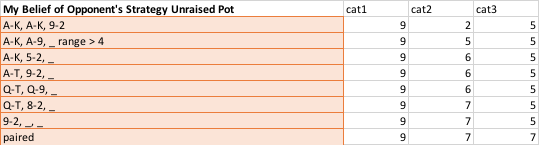

At first I gave cat3 the value 2, but I know others like to cbet so I just increased it a bit to increase cat3 combos

Updated second to last to be cat3: 6

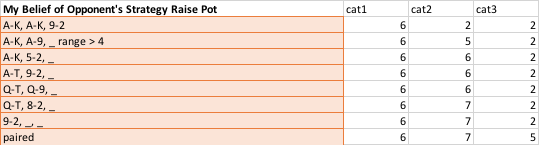

Follow this image, but never raise with cat3, just call

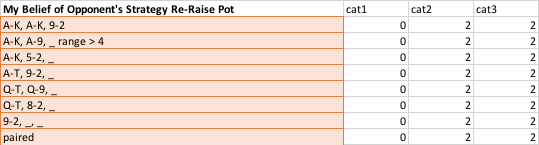

My theory is that people are folding too much to check/raise.  If this is true it's very profitable, if false then I'll have to update my assumptions or go a more game theory optimal approach instead of hard coding opponent's strategy, or even forego optimizing and focus on balancing 2:1 bluffs.

The 1% poker book talks about people folding too much turn/river, so it makes sense that the second bet even when made on the flop will fold out a lot of hands especially vs nitty players, maybe not so much calling stations.